<a href="https://colab.research.google.com/github/reneto-unstoppable/flood-prediction/blob/main/flood_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# Flood Prediction Project
## Week 1 & Week 2

# This notebook covers:
# - **Week 1**: Data loading, exploration, and basic EDA
# - **Week 2**: Advanced EDA, data transformation, feature selection, and train-test split

# Dataset: `flood.csv` (from GitHub repo)
# Target variable: **FloodProbability** (regression problem)


In [41]:
## Week 1 - Data Loading & Exploration

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset directly from GitHub
url = "https://raw.githubusercontent.com/reneto-unstoppable/flood-prediction/main/flood.csv"
df = pd.read_csv(url)

print("==== Dataset Info ====")
df.info()


==== Dataset Info ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  


In [43]:
# Summary statistics
print("\n==== Summary Statistics ====")
print(df.describe())

# Check missing values
print("\n==== Missing Values ====")
print(df.isnull().sum())

# Check duplicates
duplicate_rows = df.duplicated().sum()
print(f"\n==== Duplicate Rows: {duplicate_rows} ====")

# Column names
print("\n==== Column Names ====")
print(df.columns.tolist())

# First 5 rows
print("\n==== First Five Rows ====")
print(df.head())



==== Summary Statistics ====
       MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
count      50000.000000        50000.000000      50000.00000   50000.000000   
mean           4.991480            4.984100          5.01594       5.008480   
std            2.236834            2.246488          2.23131       2.222743   
min            0.000000            0.000000          0.00000       0.000000   
25%            3.000000            3.000000          3.00000       3.000000   
50%            5.000000            5.000000          5.00000       5.000000   
75%            6.000000            6.000000          6.00000       6.000000   
max           16.000000           18.000000         16.00000      17.000000   

       Urbanization  ClimateChange  DamsQuality     Siltation  \
count  50000.000000   50000.000000  50000.00000  50000.000000   
mean       4.989060       4.988340      5.01536      4.988600   
std        2.243159       2.226761      2.24500      2.232642  

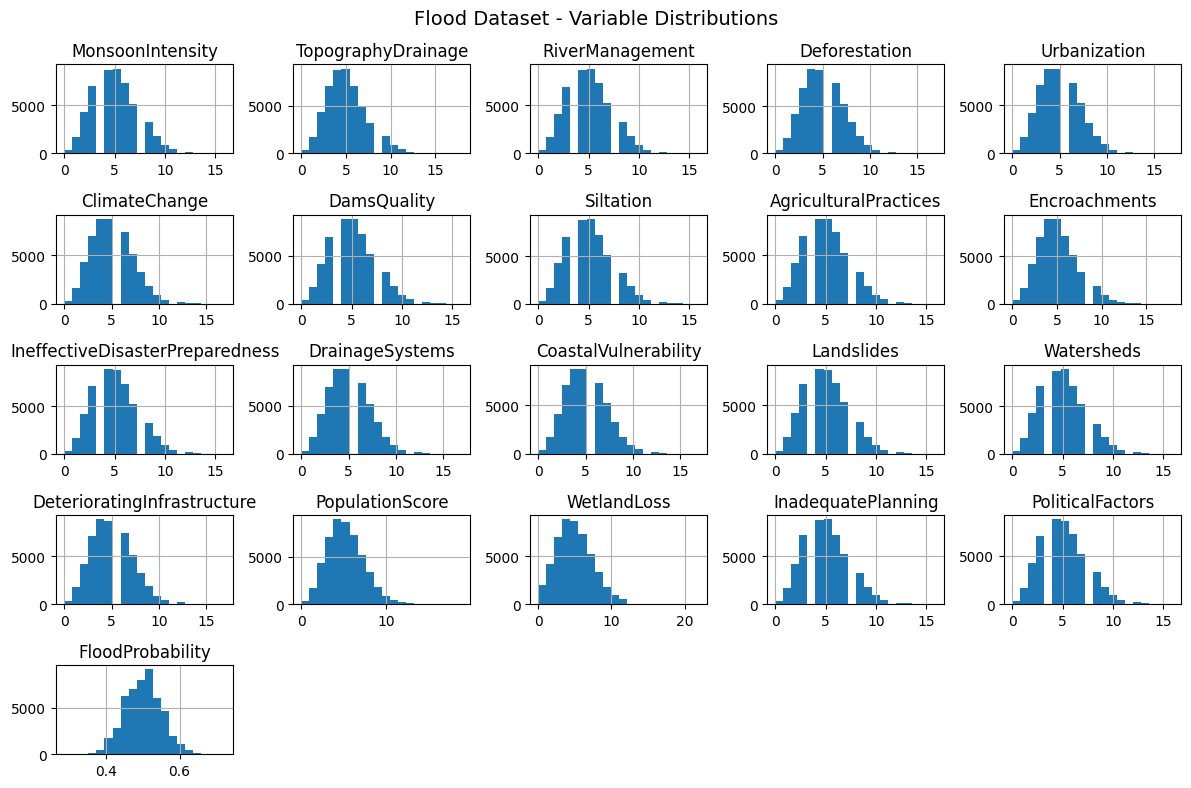

In [44]:
# Histograms of all features
df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Flood Dataset - Variable Distributions", fontsize=14)
plt.tight_layout()
plt.show()


In [45]:
## Week 2 - Advanced EDA

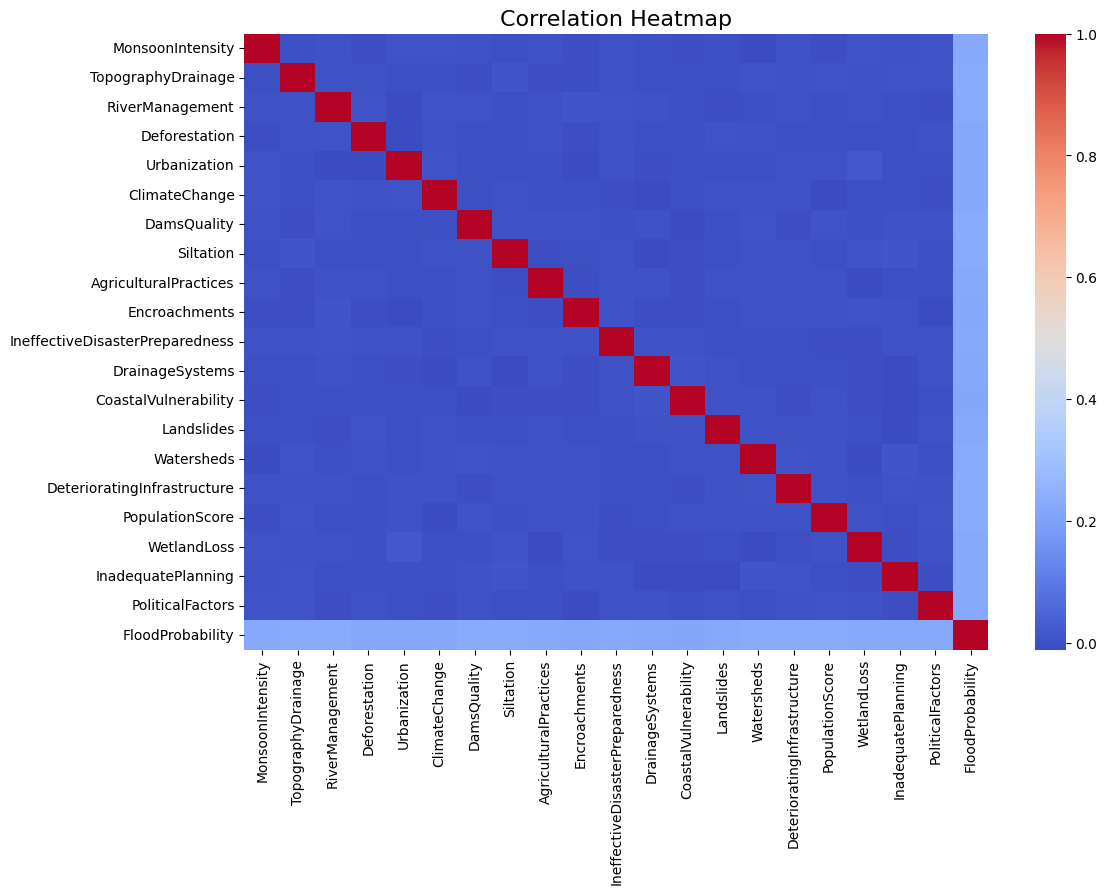

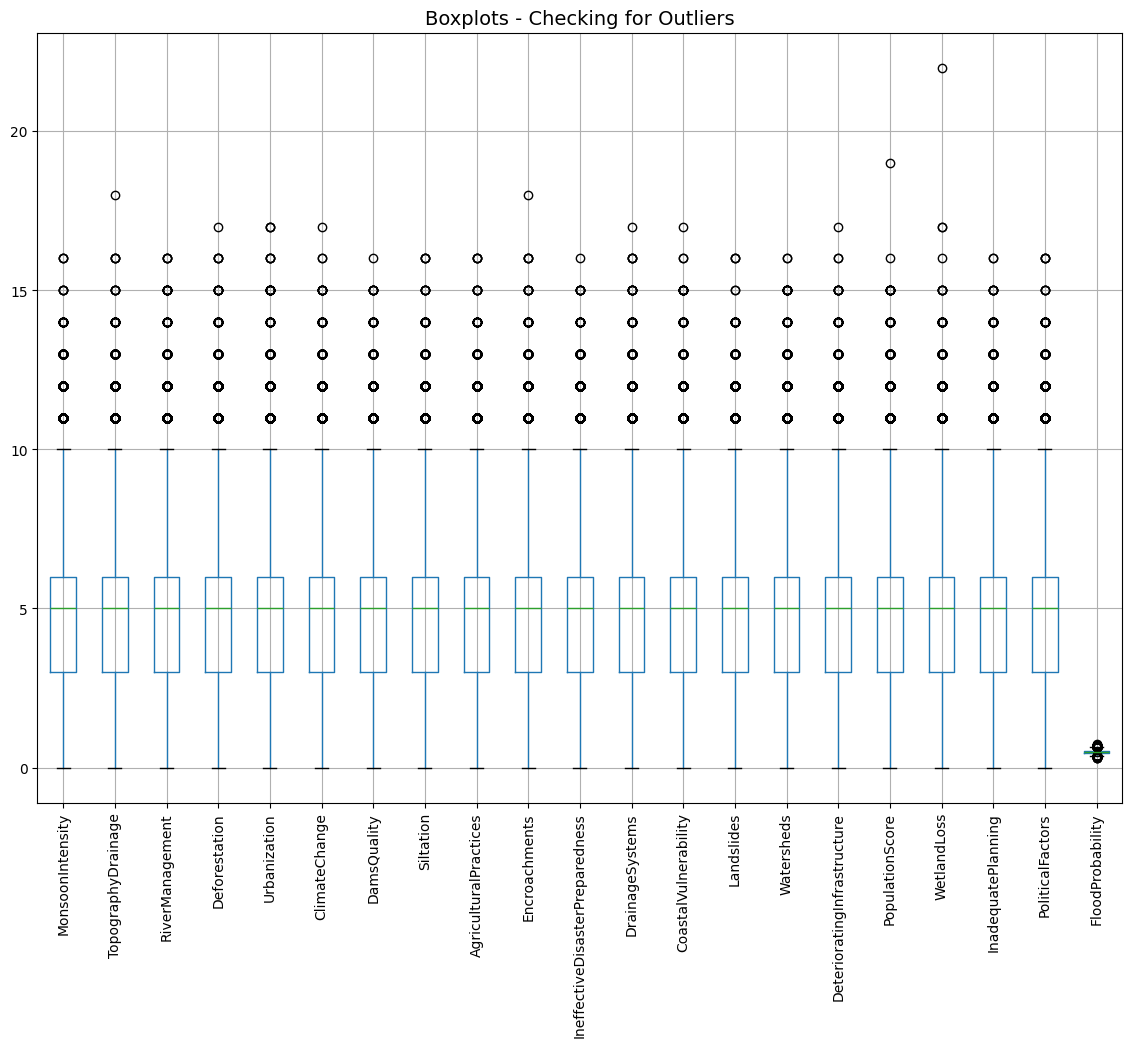

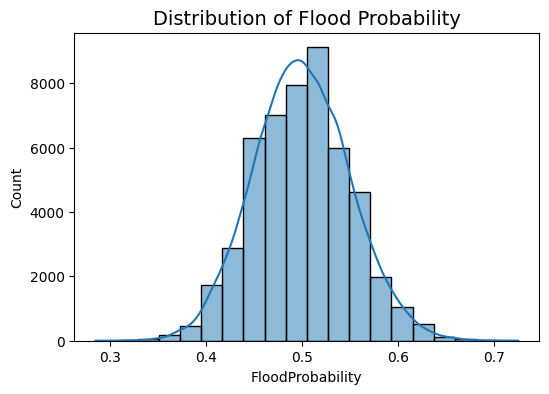

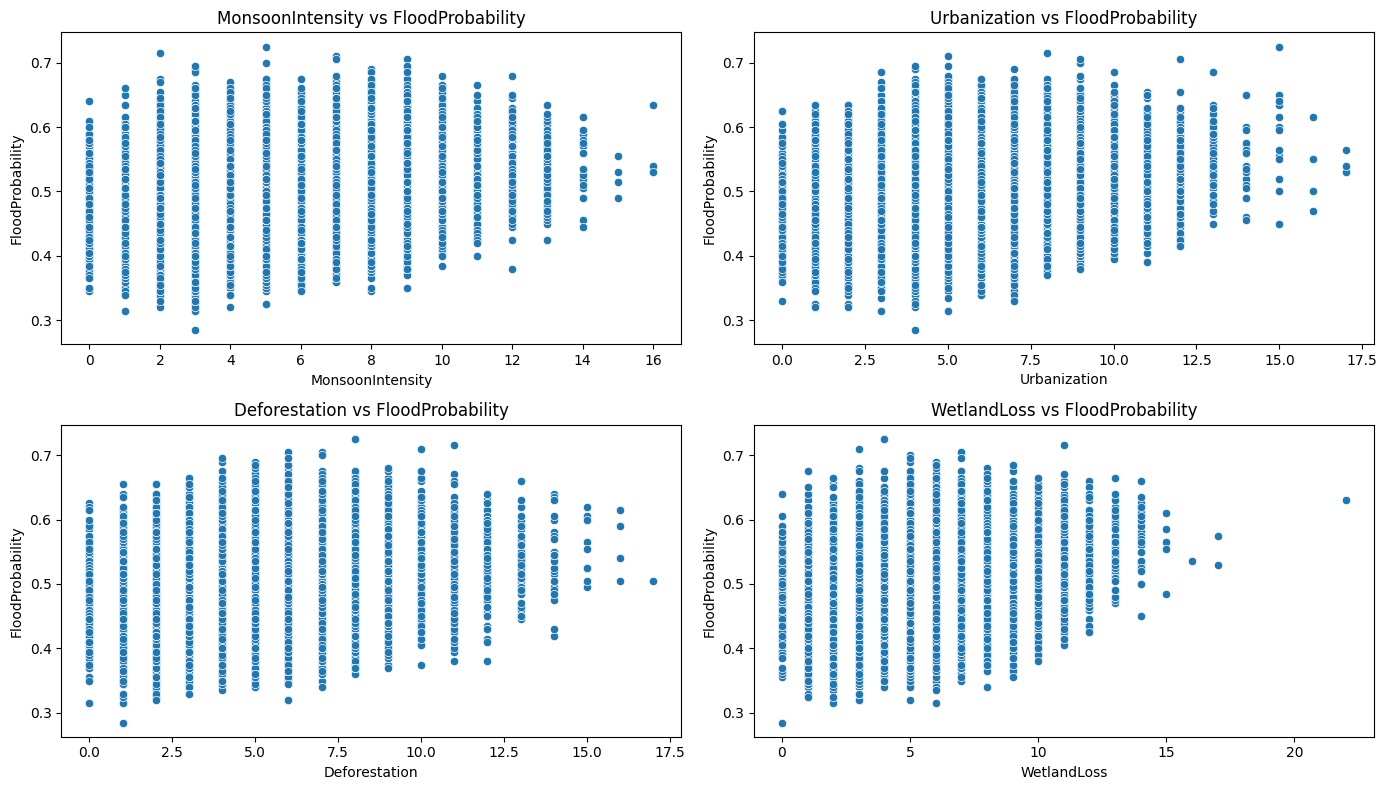

In [46]:
import seaborn as sns

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Boxplots for Outlier Detection
plt.figure(figsize=(14, 10))
df.boxplot(rot=90)
plt.title("Boxplots - Checking for Outliers", fontsize=14)
plt.show()

# Distribution of Target Variable
plt.figure(figsize=(6, 4))
sns.histplot(df["FloodProbability"], kde=True, bins=20)
plt.title("Distribution of Flood Probability", fontsize=14)
plt.show()

# Scatterplots for selected features vs target
features_to_plot = ["MonsoonIntensity", "Urbanization", "Deforestation", "WetlandLoss"]
plt.figure(figsize=(14, 8))
for i, col in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[col], y=df["FloodProbability"])
    plt.title(f"{col} vs FloodProbability")
plt.tight_layout()
plt.show()


In [47]:
## Week 2 - Data Transformation

In [48]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Check skewness
print("\n==== Skewness of Features ====")
print(df.skew())

# Apply log transform to skewed features (skew > 1)
skewed_cols = df.drop("FloodProbability", axis=1).skew()
skewed_features = skewed_cols[skewed_cols > 1].index
print("\nColumns transformed with log1p:", list(skewed_features))

df[skewed_features] = np.log1p(df[skewed_features])

# Scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df.drop("FloodProbability", axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df.drop("FloodProbability", axis=1).columns)

# Add target column back
df_scaled["FloodProbability"] = df["FloodProbability"].values

print("\n==== Scaled Data Sample ====")
print(df_scaled.head())



==== Skewness of Features ====
MonsoonIntensity                   0.435061
TopographyDrainage                 0.468026
RiverManagement                    0.432706
Deforestation                      0.452334
Urbanization                       0.473563
ClimateChange                      0.444346
DamsQuality                        0.444013
Siltation                          0.459471
AgriculturalPractices              0.425494
Encroachments                      0.459761
IneffectiveDisasterPreparedness    0.441500
DrainageSystems                    0.456434
CoastalVulnerability               0.458631
Landslides                         0.428130
Watersheds                         0.470939
DeterioratingInfrastructure        0.445130
PopulationScore                    0.462230
WetlandLoss                        0.444226
InadequatePlanning                 0.459092
PoliticalFactors                   0.447474
FloodProbability                   0.095412
dtype: float64

Columns transformed with log

In [49]:
## Week 2 - Feature Selection

/tmp/ipython-input-2572236121.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[:10], y=importances.index[:10], palette="viridis")


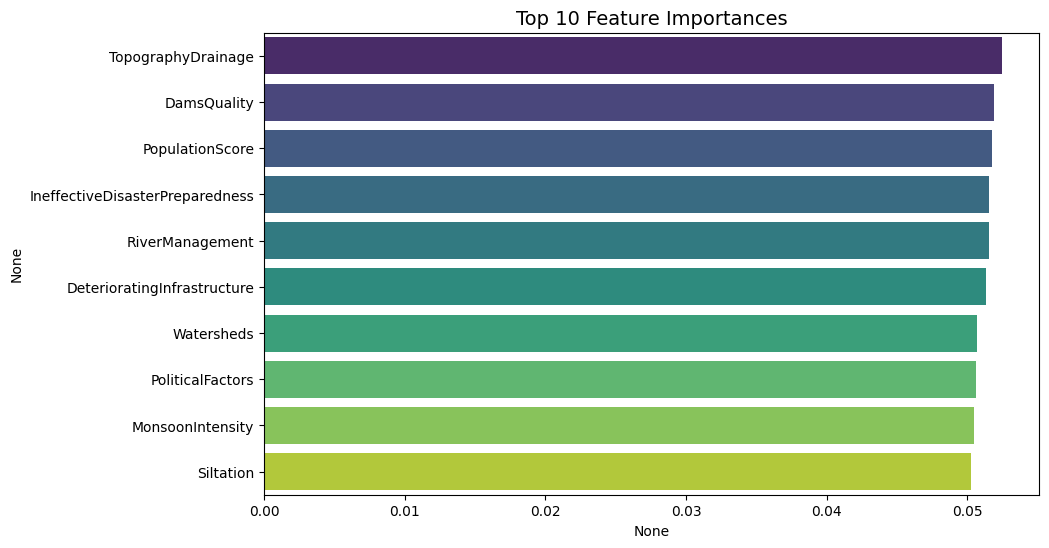


==== Top Features for Flood Prediction ====
TopographyDrainage                 0.052467
DamsQuality                        0.051875
PopulationScore                    0.051727
IneffectiveDisasterPreparedness    0.051569
RiverManagement                    0.051512
DeterioratingInfrastructure        0.051311
Watersheds                         0.050660
PoliticalFactors                   0.050594
MonsoonIntensity                   0.050452
Siltation                          0.050262
dtype: float64


In [50]:
from sklearn.ensemble import RandomForestRegressor

X = df_scaled.drop("FloodProbability", axis=1)
y = df_scaled["FloodProbability"]

# Train RandomForest for feature importance
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[:10], y=importances.index[:10], palette="viridis")
plt.title("Top 10 Feature Importances", fontsize=14)
plt.show()

print("\n==== Top Features for Flood Prediction ====")
print(importances[:10])


In [51]:
## Week 2 - Train-Test Split

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTrain shape:", X_train.shape)
print("Test shape:", X_test.shape)



Train shape: (40000, 20)
Test shape: (10000, 20)


In [53]:
# Flood Prediction Project
## Week 1 & Week 2

# This notebook covers:
# - **Week 1**: Data loading, exploration, and basic EDA
# - **Week 2**: Advanced EDA, data transformation, feature selection, and train-test split

# Dataset: `flood.csv` (from GitHub repo)
# Target variable: **FloodProbability** (regression problem)


In [54]:
## Week 1 - Data Loading & Exploration

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset directly from GitHub
url = "https://raw.githubusercontent.com/reneto-unstoppable/flood-prediction/main/flood.csv"
df = pd.read_csv(url)

print("==== Dataset Info ====")
df.info()


==== Dataset Info ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  


In [56]:
# Summary statistics
print("\n==== Summary Statistics ====")
print(df.describe())

# Check missing values
print("\n==== Missing Values ====")
print(df.isnull().sum())

# Check duplicates
duplicate_rows = df.duplicated().sum()
print(f"\n==== Duplicate Rows: {duplicate_rows} ====")

# Column names
print("\n==== Column Names ====")
print(df.columns.tolist())

# First 5 rows
print("\n==== First Five Rows ====")
print(df.head())



==== Summary Statistics ====
       MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
count      50000.000000        50000.000000      50000.00000   50000.000000   
mean           4.991480            4.984100          5.01594       5.008480   
std            2.236834            2.246488          2.23131       2.222743   
min            0.000000            0.000000          0.00000       0.000000   
25%            3.000000            3.000000          3.00000       3.000000   
50%            5.000000            5.000000          5.00000       5.000000   
75%            6.000000            6.000000          6.00000       6.000000   
max           16.000000           18.000000         16.00000      17.000000   

       Urbanization  ClimateChange  DamsQuality     Siltation  \
count  50000.000000   50000.000000  50000.00000  50000.000000   
mean       4.989060       4.988340      5.01536      4.988600   
std        2.243159       2.226761      2.24500      2.232642  

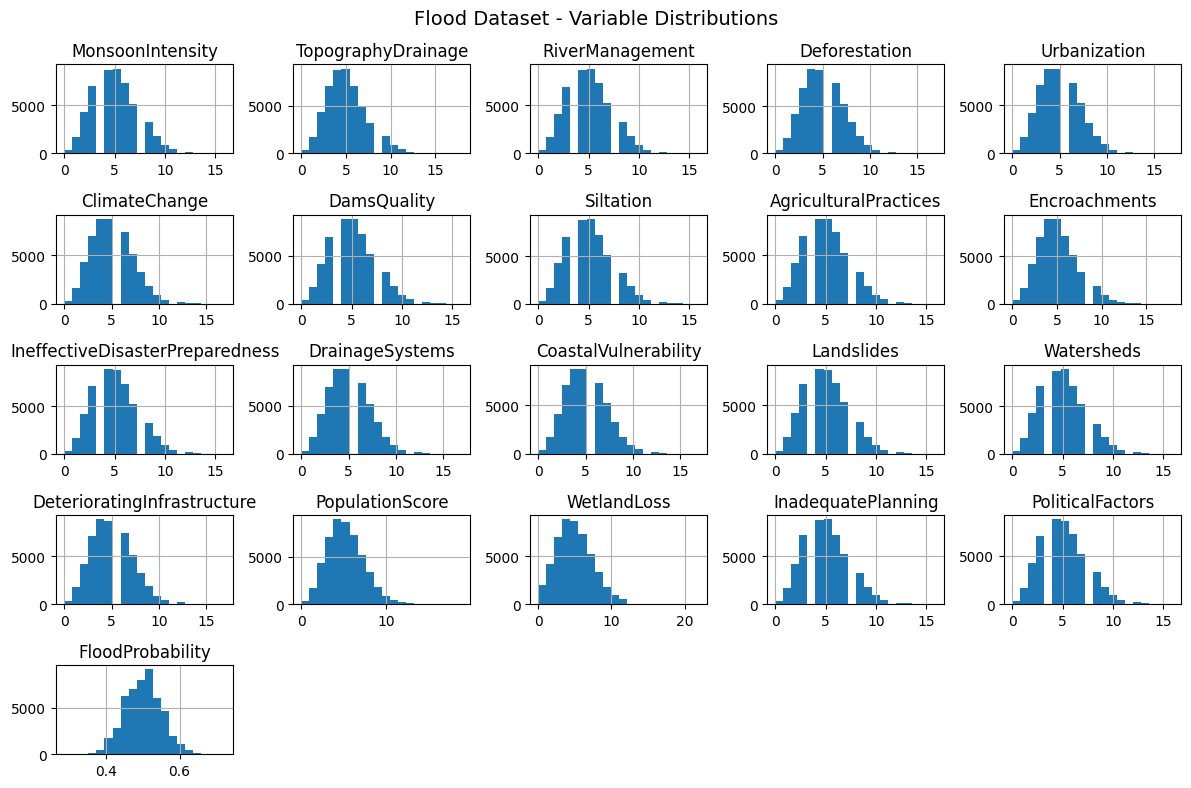

In [57]:
# Histograms of all features
df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Flood Dataset - Variable Distributions", fontsize=14)
plt.tight_layout()
plt.show()


In [58]:
## Week 2 - Advanced EDA

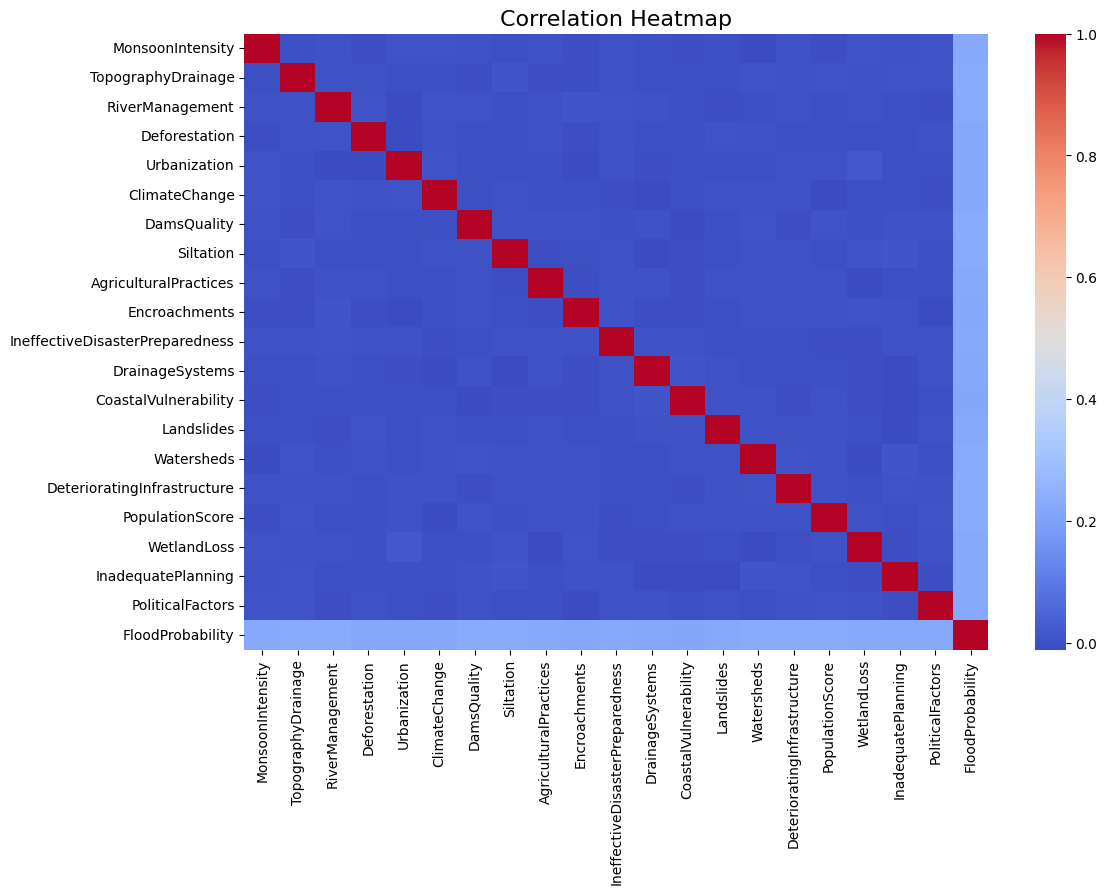

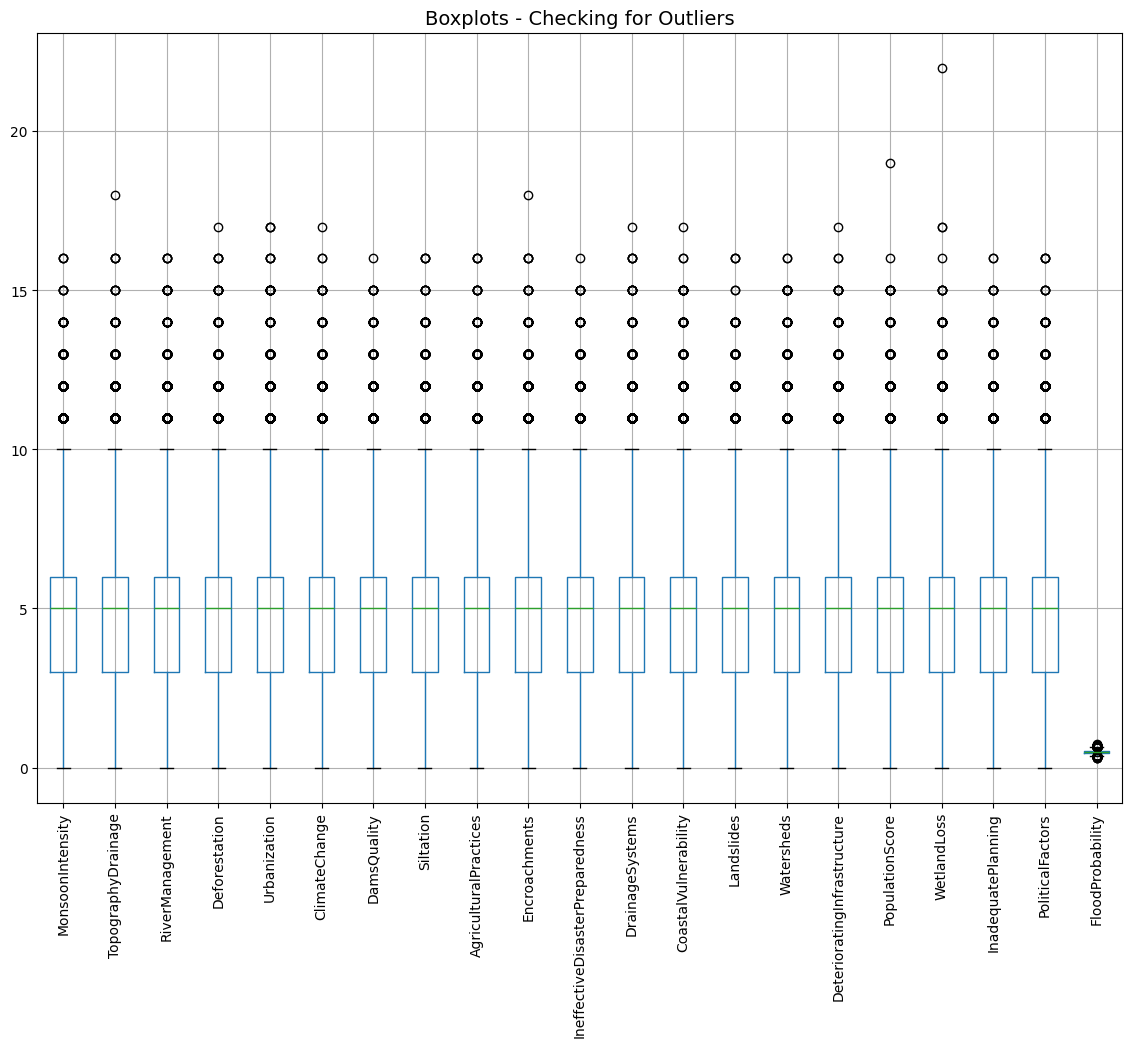

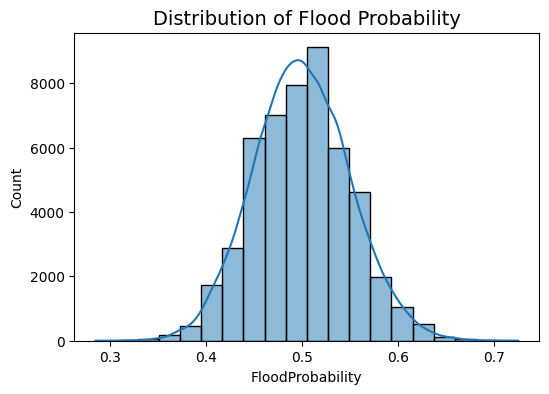

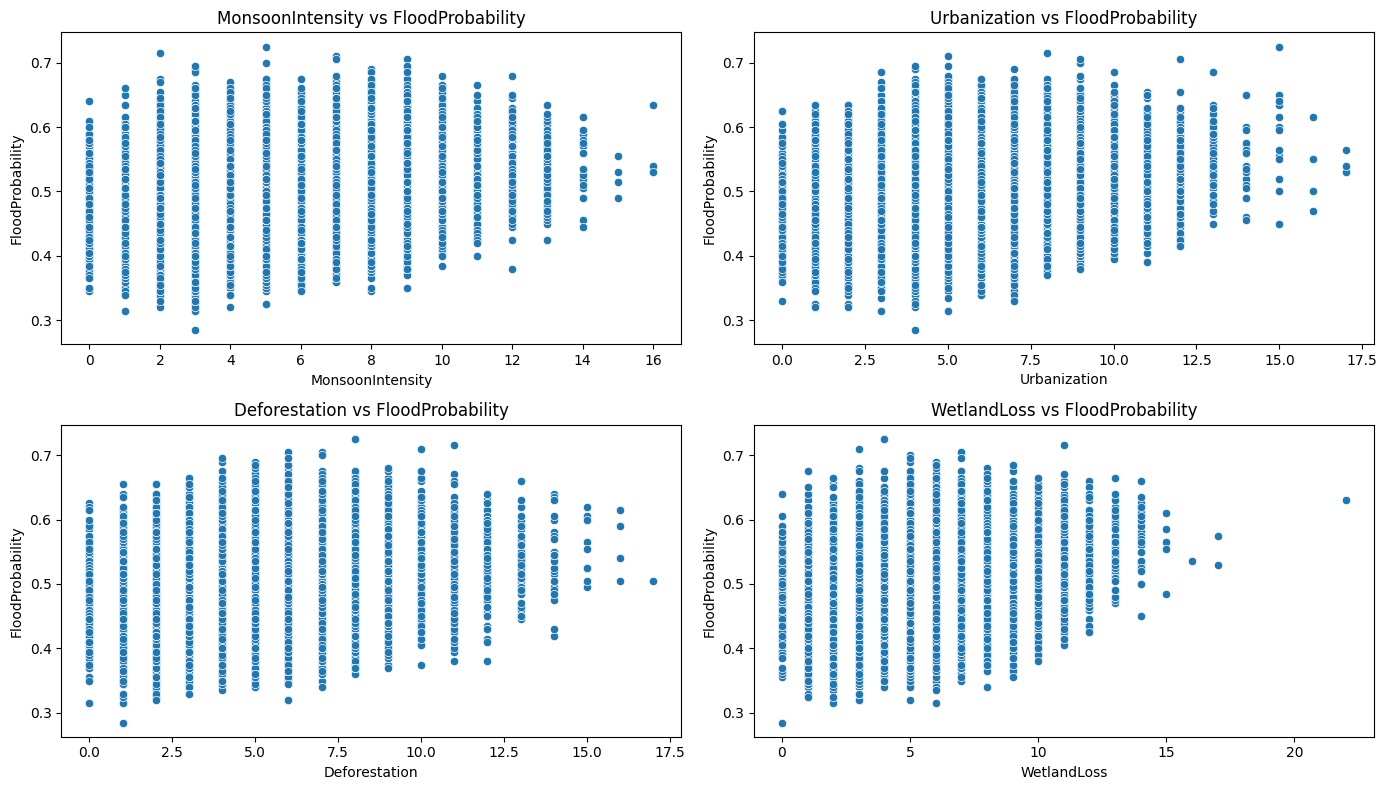

In [59]:
import seaborn as sns

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Boxplots for Outlier Detection
plt.figure(figsize=(14, 10))
df.boxplot(rot=90)
plt.title("Boxplots - Checking for Outliers", fontsize=14)
plt.show()

# Distribution of Target Variable
plt.figure(figsize=(6, 4))
sns.histplot(df["FloodProbability"], kde=True, bins=20)
plt.title("Distribution of Flood Probability", fontsize=14)
plt.show()

# Scatterplots for selected features vs target
features_to_plot = ["MonsoonIntensity", "Urbanization", "Deforestation", "WetlandLoss"]
plt.figure(figsize=(14, 8))
for i, col in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[col], y=df["FloodProbability"])
    plt.title(f"{col} vs FloodProbability")
plt.tight_layout()
plt.show()


In [60]:
## Week 2 - Data Transformation

In [61]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Check skewness
print("\n==== Skewness of Features ====")
print(df.skew())

# Apply log transform to skewed features (skew > 1)
skewed_cols = df.drop("FloodProbability", axis=1).skew()
skewed_features = skewed_cols[skewed_cols > 1].index
print("\nColumns transformed with log1p:", list(skewed_features))

df[skewed_features] = np.log1p(df[skewed_features])

# Scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df.drop("FloodProbability", axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df.drop("FloodProbability", axis=1).columns)

# Add target column back
df_scaled["FloodProbability"] = df["FloodProbability"].values

print("\n==== Scaled Data Sample ====")
print(df_scaled.head())



==== Skewness of Features ====
MonsoonIntensity                   0.435061
TopographyDrainage                 0.468026
RiverManagement                    0.432706
Deforestation                      0.452334
Urbanization                       0.473563
ClimateChange                      0.444346
DamsQuality                        0.444013
Siltation                          0.459471
AgriculturalPractices              0.425494
Encroachments                      0.459761
IneffectiveDisasterPreparedness    0.441500
DrainageSystems                    0.456434
CoastalVulnerability               0.458631
Landslides                         0.428130
Watersheds                         0.470939
DeterioratingInfrastructure        0.445130
PopulationScore                    0.462230
WetlandLoss                        0.444226
InadequatePlanning                 0.459092
PoliticalFactors                   0.447474
FloodProbability                   0.095412
dtype: float64

Columns transformed with log

In [62]:
## Week 2 - Feature Selection

/tmp/ipython-input-2572236121.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[:10], y=importances.index[:10], palette="viridis")


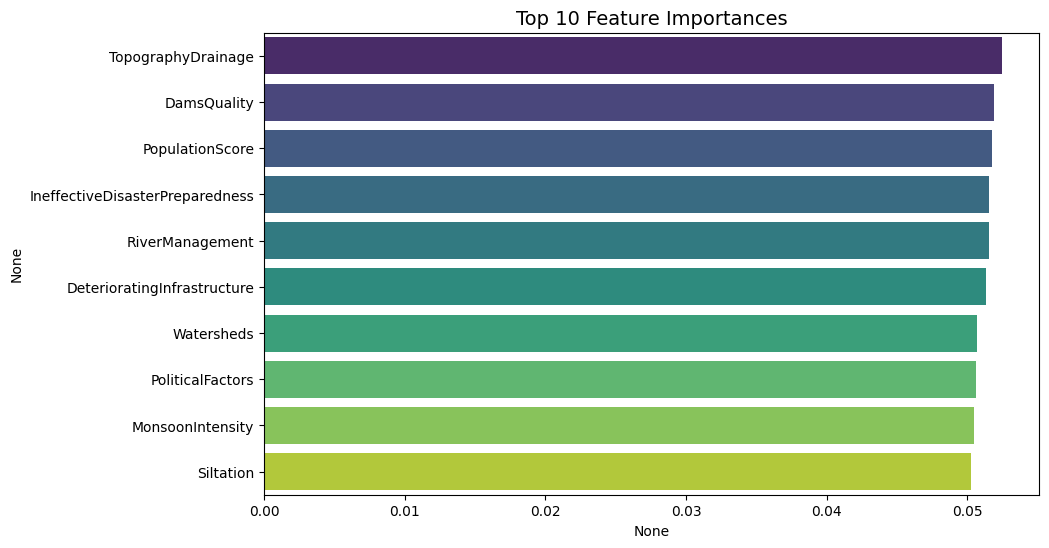


==== Top Features for Flood Prediction ====
TopographyDrainage                 0.052467
DamsQuality                        0.051875
PopulationScore                    0.051727
IneffectiveDisasterPreparedness    0.051569
RiverManagement                    0.051512
DeterioratingInfrastructure        0.051311
Watersheds                         0.050660
PoliticalFactors                   0.050594
MonsoonIntensity                   0.050452
Siltation                          0.050262
dtype: float64


In [63]:
from sklearn.ensemble import RandomForestRegressor

X = df_scaled.drop("FloodProbability", axis=1)
y = df_scaled["FloodProbability"]

# Train RandomForest for feature importance
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[:10], y=importances.index[:10], palette="viridis")
plt.title("Top 10 Feature Importances", fontsize=14)
plt.show()

print("\n==== Top Features for Flood Prediction ====")
print(importances[:10])


In [64]:
## Week 2 - Train-Test Split

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTrain shape:", X_train.shape)
print("Test shape:", X_test.shape)



Train shape: (40000, 20)
Test shape: (10000, 20)


In [66]:
# =============================
# Week 3 - Model Building & Evaluation
# =============================

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Baseline Model - Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("\n==== Linear Regression Performance ====")
print("MAE :", mean_absolute_error(y_test, y_pred_lr))
print("MSE :", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R²   :", r2_score(y_test, y_pred_lr))


==== Linear Regression Performance ====
MAE : 6.06958927562573e-17
MSE : 6.954301917588983e-33
RMSE: 8.339245719841203e-17
R²   : 1.0


In [68]:
# 2. Advanced Model - Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=200)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n==== Random Forest Performance ====")
print("MAE :", mean_absolute_error(y_test, y_pred_rf))
print("MSE :", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²   :", r2_score(y_test, y_pred_rf))


==== Random Forest Performance ====
MAE : 0.020336577499999977
MSE : 0.0006648392058124984
RMSE: 0.025784476062400384
R²   : 0.7330590976516753


In [69]:
# 3. Compare Models
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mean_absolute_error(y_test, y_pred_lr), mean_absolute_error(y_test, y_pred_rf)],
    "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_lr)), np.sqrt(mean_squared_error(y_test, y_pred_rf))],
    "R² Score": [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_rf)]
})

print("\n==== Model Comparison ====")
print(results)


==== Model Comparison ====
               Model           MAE          RMSE  R² Score
0  Linear Regression  6.069589e-17  8.339246e-17  1.000000
1      Random Forest  2.033658e-02  2.578448e-02  0.733059


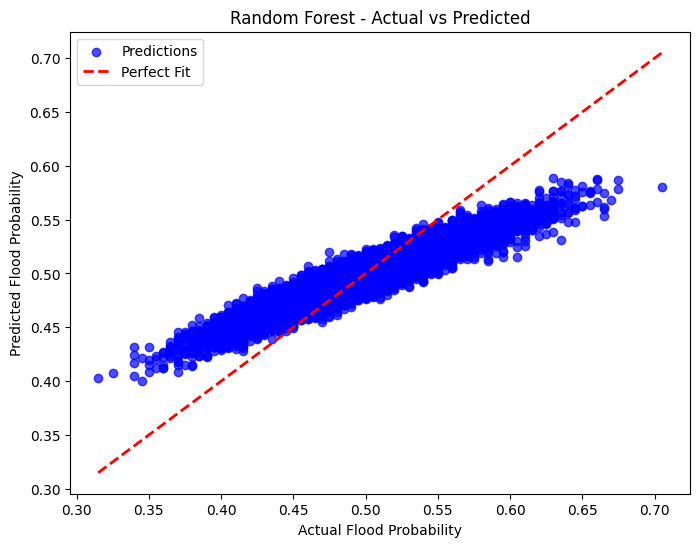

In [70]:
# 4. Visualization - Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color="blue", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")
plt.xlabel("Actual Flood Probability")
plt.ylabel("Predicted Flood Probability")
plt.title("Random Forest - Actual vs Predicted")
plt.legend()
plt.show()

In [73]:
# =============================
# Week 3 - Save & Load Model (.pkl)
# =============================

import joblib
import os

# Check current working directory
print("📂 Current working directory:", os.getcwd())

# Use the absolute path to your flood-prediction folder
save_dir = r"C:\Users\renet\flood-prediction"
os.makedirs(save_dir, exist_ok=True)  # make sure it exists
save_path = os.path.join(save_dir, "flood_model.pkl")

# Save the trained Random Forest model
joblib.dump(rf_model, save_path)
print(f"✅ Model saved at: {save_path}")

# (Optional) Load the model back
loaded_model = joblib.load(save_path)

# Test prediction on one sample
sample = X_test.iloc[[0]]
sample_pred = loaded_model.predict(sample)
print(f"Sample Prediction: {sample_pred} | Actual: {y_test.iloc[0]}")


📂 Current working directory: /content
✅ Model saved at: C:\Users\renet\flood-prediction/flood_model.pkl
Sample Prediction: [0.467625] | Actual: 0.455


In [74]:
import joblib
from google.colab import files

# Save in Colab
joblib.dump(rf_model, "flood_model.pkl")
print("✅ Model saved in Colab at /content/flood_model.pkl")

# Download to your local system
files.download("flood_model.pkl")


✅ Model saved in Colab at /content/flood_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [79]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload files

import pandas as pd
data = pd.read_csv("flood.csv")
print(list(data.columns))


Saving flood.csv to flood.csv
['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors', 'FloodProbability']
